In [1]:
#подключаем нужные библиотеки
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files
import os

In [2]:
#подключаем гугл-диск с тренировочными данными
from google.colab import drive
drive.mount('/content/drive/')
#img = load_img('...')
#plt.imshow(img)

Mounted at /content/drive/


In [3]:
#функция для изменения размера изображений, чтобы поместить их в нейросеть
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [ ]:
#загрузка и обработка тренировочных данных
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/',
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['araneus', 'cellarspider', 'crabspider', 'happyfacespider', 'jumpingspider', 'seaspider', 'spiderman', 'tarantula', 'waspspider', 'wolfspider'],
    color_mode="rgb",
    batch_size=16,
    image_size=(SIZE, SIZE),  # reshape if not in this size
    shuffle=True,
    seed=123,
)

Found 5185 files belonging to 2 classes.


In [4]:
#в качестве начальных слоёв нашей модели берём готовую нейросеть MobileNetV2, не обучаем эти слои
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [5]:
#модель нейронной сети
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])

#оптимизатор для бинарных данных
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [6]:
#загружаем веса уже обученной модели
model.load_weights('/content/drive/MyDrive/savedweights/')

In [ ]:
#или можем выбрать, сколько эпох тренировать модель
model.fit(ds_train, epochs=1)

325/325 [==============================] - 273s 824ms/step - loss: 0.2953 - accuracy: 0.8665


In [ ]:
model.fit(ds_train, epochs=3)

Epoch 1/2
325/325 [==============================] - 204s 627ms/step - loss: 0.1630 - accuracy: 0.9396
Epoch 2/2
325/325 [==============================] - 200s 616ms/step - loss: 0.1280 - accuracy: 0.9524


In [ ]:
model.fit(ds_train, epochs=5)

Epoch 1/5
325/325 [==============================] - 314s 950ms/step - loss: 0.1625 - accuracy: 0.9381
Epoch 2/5
325/325 [==============================] - 200s 612ms/step - loss: 0.1293 - accuracy: 0.9510
Epoch 3/5
325/325 [==============================] - 207s 635ms/step - loss: 0.1181 - accuracy: 0.9549
Epoch 4/5
325/325 [==============================] - 196s 602ms/step - loss: 0.1052 - accuracy: 0.9599
Epoch 5/5
325/325 [==============================] - 195s 600ms/step - loss: 0.0938 - accuracy: 0.9651


In [ ]:
#сохраняем веса, если хотим
model.save_weights('/content/drive/MyDrive/savedweights/')

In [13]:
#загружаем изображения, на которых нужно найти паука
files.upload()

Saving sea.jpg to sea.jpg


{'sea.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x06\x04\x04\x05\x04\x04\x06\x05\x05\x05\x06\x06\x06\x07\t\x0e\t\t\x08\x08\t\x12\r\r\n\x0e\x15\x12\x16\x16\x15\x12\x14\x14\x17\x1a!\x1c\x17\x18\x1f\x19\x14\x14\x1d\'\x1d\x1f"#%%%\x16\x1c),($+!$%$\xff\xdb\x00C\x01\x06\x06\x06\t\x08\t\x11\t\t\x11$\x18\x14\x18$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\xff\xc0\x00\x11\x08\x06\xab\n\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x00\x06\x07\x08\xff\xc4\x00L\x10\x00\x02\x01\x03\x03\x02\x05\x02\x03\x06\x04\x05\x03\x01\x02\x0f\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13"Qa\x14q2\x81\x91\x07\x15#BR\xa1b\xb1\xc1\xd1$3Sr\xe1\x16C\x92\xf0\x82\xf1c\x08%4s\x17D\xa2&5\xb2\xc2\x18\x83\xf2\xff\xc4\x00\x1b\x01\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x005\x11\x00\x02\x02\x02\x02\x02\x02\x02\x02

1/1 [==============================] - 0s 93ms/step


Text(0.5, 1.0, 'Нет паука 0.13475774228572845')

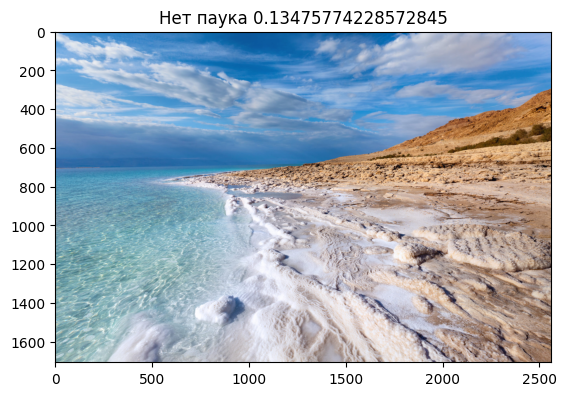

In [14]:
#модель ищет паука на полученном изображении, необходимо указать имя файла с изображением
#чем больше число над картинкой, тем больше модель уверена, что на ней есть паук
img = load_img(f'sea.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, _)
img_expended = np.expand_dims(img_resized, axis=0)
prediction = model.predict(img_expended)[0][0]
pred_label = 'Нет паука' if prediction < 3 else 'Найден паук ::::)'
plt.figure()
plt.imshow(img)
plt.title(f'{pred_label} {prediction}')

In [ ]:
#неиспользованный код
#train_label = np.concatenate([y for x, y in ds_train], axis=0)
#for i in range(100):
#    print(train_label[i])

#directory = "/content/drive/MyDrive/spiderdataset/"
#df = pd.read_csv(directory + "train.csv")

#file_paths = df["file_name"].values
#labels = df["label"].values
#ds_train = tf.data.Dataset.from_tensor_slices((file_paths, labels))

#def read_image(image_file, label):
#    image = tf.io.read_file(directory + image_file)
#    image = tf.image.decode_image(image, channels=3, dtype=tf.float32)
#    label = to_categorical(label, 10)
#    return image, label

#ds_train = ds_train.map(read_image).batch(2)